<br>
<center>
<h1>Workforce Analytics</h1>
<h2><i> - Seongmin Lee(CID: 01247436)  -</i></h2>

# Research Category on Web of Science
**Example link** : http://jcr.incites.thomsonreuters.com/JCRHomePageAction.action?

In the Web of  Science, there are 227 research categories. In each research category, we can collect the dataset including impact factors. As opposed to the department title of "Business School", most of the publications cover a variety of research fields, such as 'Health Policy & Services', 'Engineering, Electrical & Electronic', or 'Electrochemistry'. Therefore, each publication might have a different cited time due to the various research categories. So, I scraped the website on "http://jcr.incites.thomsonreuters.com/JCRHomePageAction.action?" which contains the research field data table by year.

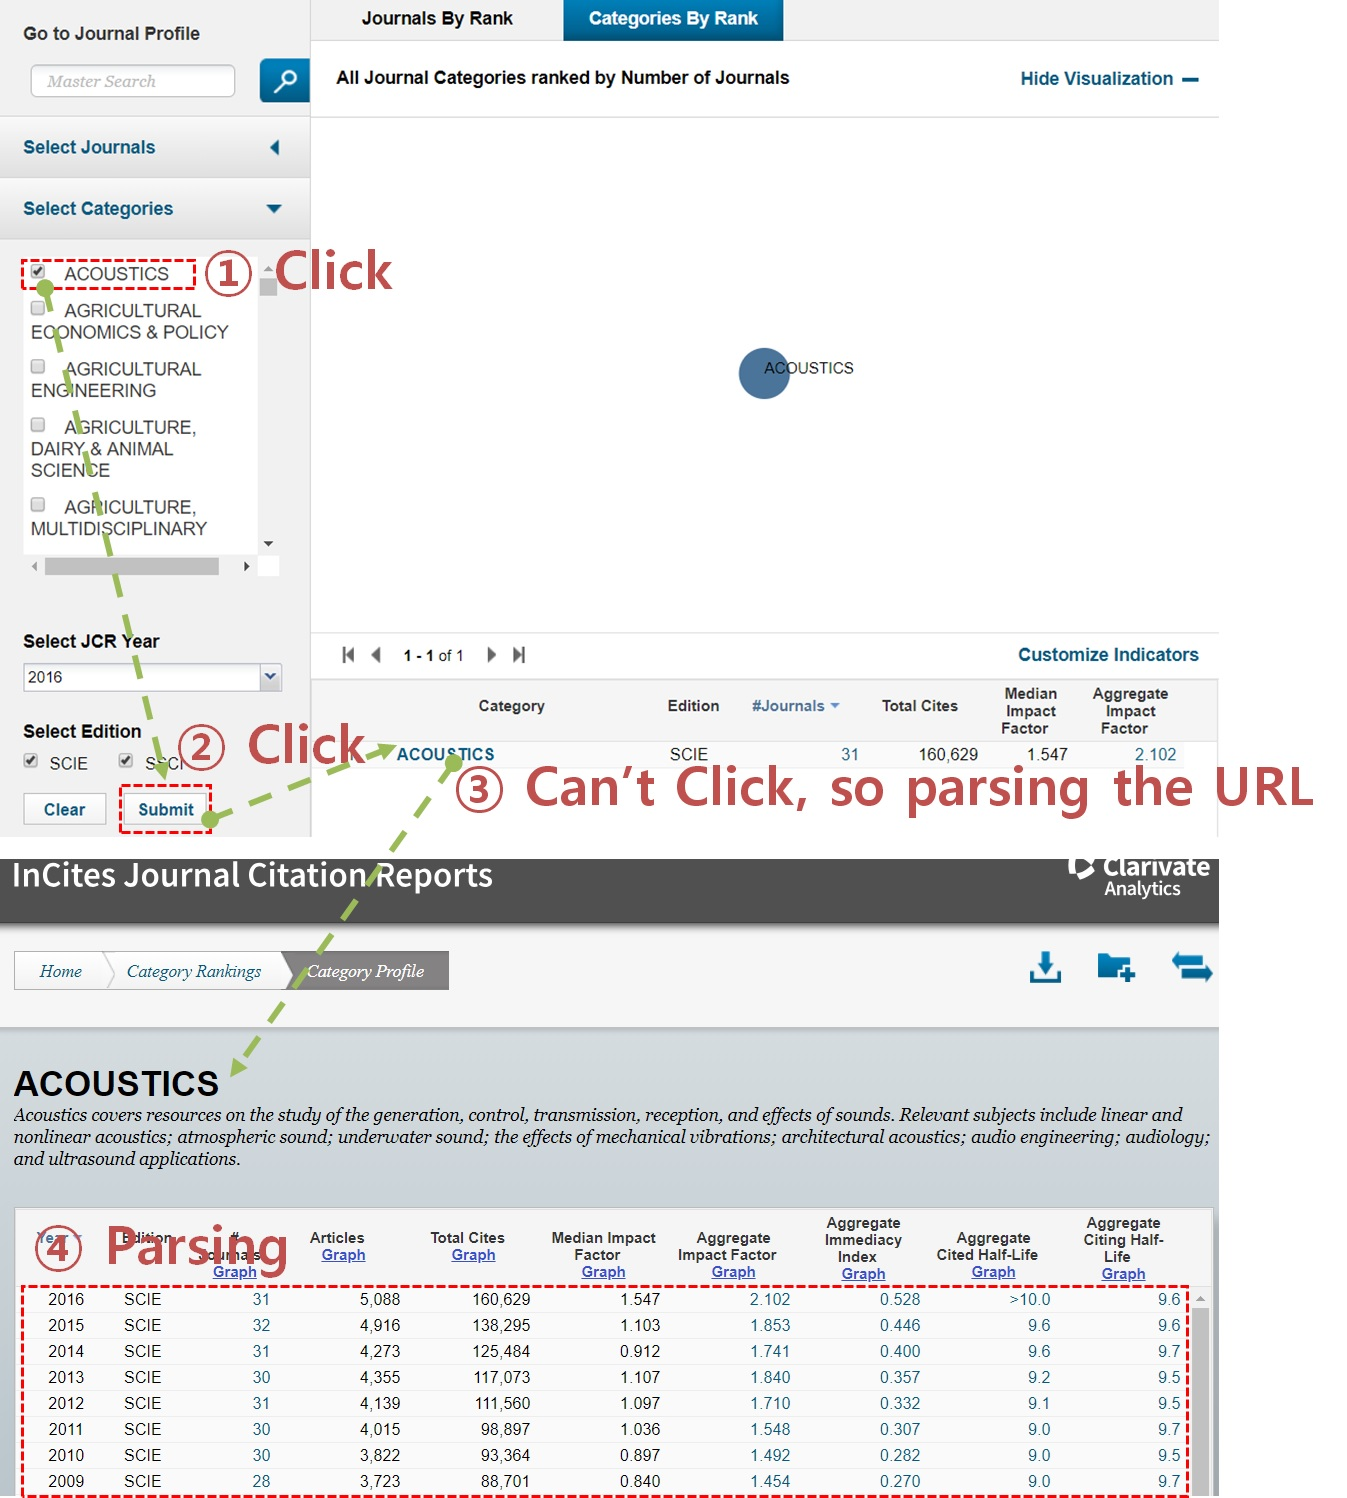

In [11]:
from IPython.display import Image
import os
Image(filename = os.getcwd()+'/img/research_category.jpg')

In [12]:
import pandas as pd
import numpy as np
import networkx as nx
import scipy as sp
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver import ActionChains
import requests
import re
import sys
import io
import time
import csv
from ast import literal_eval
import random


# URL Collection

In [205]:
chrome_options = Options()
chrome_options.add_argument('--lang=en-us')
driver = webdriver.Chrome(chrome_options=chrome_options,executable_path="C:/Users/seong/Downloads/chrome/chromedriver")

#Log-in on Web of Science
driver.get('http://jcr.incites.thomsonreuters.com/JCRJournalHomeAction.action')

try:
    driver.find_element_by_id('username').send_keys('')
    driver.find_element_by_id('password').send_keys('')
    driver.find_element_by_xpath('/html/body/div/div[1]/div[3]/div[1]/div/div/div/form[1]/button').click()
except:
    pass 

driver.implicitly_wait(10)  

try:
    driver.find_element_by_class_name('btn.btn-secondary').click()
except:
    pass

#category by rank click
driver.implicitly_wait(10)  
driver.find_element_by_xpath('//*[@id="skip-to-content"]/div/div[2]/div[2]/div[1]/ul/li[2]/a').click() #category by rank tab
driver.implicitly_wait(10)
driver.find_element_by_xpath('//*[@id="skip-to-content"]/div/div[1]/div[1]/div/div[6]/div[3]/a[1]').click() #clear box
driver.implicitly_wait(10)
driver.find_element_by_xpath('//*[@id="skip-to-content"]/div/div[1]/div[1]/div/div[4]/i').click() #triangle check box open
time.sleep(2)

soup = BeautifulSoup(driver.page_source, "html.parser")
names_parsing = soup.select("div.category-selection > label >  input")
keys = []
for name in names_parsing:
    keys.append(name.attrs['value'])
    
sub_parsing = soup.select("div.category-selection > label >  span")
subjects = []
for sub in sub_parsing:
    subjects.append(sub.string)
    
driver.find_element_by_xpath('//*[@id="skip-to-content"]/div/div[1]/div[1]/div/div[4]/i').click() #triangle check box close
driver.implicitly_wait(10)

cate_names = []
for key, sub in zip(keys, subjects):
    driver.find_element_by_xpath('//*[@id="skip-to-content"]/div/div[1]/div[1]/div/div[4]/i').click() #triangle check box open
    driver.implicitly_wait(10) 
    driver.find_element_by_xpath('//*[@id="skip-to-content"]/div/div[1]/div[1]/div/div[6]/div[3]/a[1]').click() #clear
    driver.implicitly_wait(10)
    driver.find_element_by_id(key).click() # check box by key
    driver.implicitly_wait(10)
    driver.find_element_by_link_text('Submit').click() #submit
    driver.implicitly_wait(10)
    driver.find_element_by_css_selector('td.x-grid-cell.x-grid-td.x-grid-cell-gridcolumn-1012.x-unselectable').click()#click the research field
    driver.implicitly_wait(10)
    
    #data store to df
    time.sleep(3)
    web_soup = BeautifulSoup(driver.page_source, "html.parser")
#     name = web_soup.select_one('div.x-dataview-item > h2#catNames').string.strip()

    try:
        cate_yrs_df = pd.read_csv('category_url.csv')

    except:
        cate_yrs_df = pd.DataFrame(columns= ['category1', 'page_url'])
    row_num = cate_yrs_df.shape[0]
    cate_yrs_df.loc[row_num, 'category1'] = sub
#     cate_yrs_df.loc[row_num, 'category2'] = name
    cate_yrs_df.loc[row_num, 'page_url'] = driver.current_url
    cate_yrs_df.to_csv('category_url.csv', index = False)
    print("%dth. Category Name: %s" %(cate_yrs_df.shape[0], sub))
    driver.execute_script("history.back();")
    time.sleep(3)
driver.quit()

1th. Category Name: ACOUSTICS
2th. Category Name: AGRICULTURAL ECONOMICS & POLICY
3th. Category Name: AGRICULTURAL ENGINEERING
4th. Category Name: AGRICULTURE, DAIRY & ANIMAL SCIENCE
5th. Category Name: AGRICULTURE, MULTIDISCIPLINARY
6th. Category Name: AGRONOMY
7th. Category Name: ALLERGY
8th. Category Name: ANATOMY & MORPHOLOGY
9th. Category Name: ANDROLOGY
10th. Category Name: ANESTHESIOLOGY
11th. Category Name: ANTHROPOLOGY
12th. Category Name: AREA STUDIES
13th. Category Name: ASTRONOMY & ASTROPHYSICS
14th. Category Name: AUDIOLOGY & SPEECH-LANGUAGE PATHOLOGY
15th. Category Name: AUTOMATION & CONTROL SYSTEMS
16th. Category Name: BEHAVIORAL SCIENCES
17th. Category Name: BIOCHEMICAL RESEARCH METHODS
18th. Category Name: BIOCHEMISTRY & MOLECULAR BIOLOGY
19th. Category Name: BIODIVERSITY CONSERVATION
20th. Category Name: BIOLOGY
21th. Category Name: BIOPHYSICS
22th. Category Name: BIOTECHNOLOGY & APPLIED MICROBIOLOGY
23th. Category Name: BUSINESS
24th. Category Name: BUSINESS, FINANCE

189th. Category Name: PSYCHOLOGY, MATHEMATICAL
190th. Category Name: PSYCHOLOGY, MULTIDISCIPLINARY
191th. Category Name: PSYCHOLOGY, PSYCHOANALYSIS
192th. Category Name: PSYCHOLOGY, SOCIAL
193th. Category Name: PUBLIC ADMINISTRATION
194th. Category Name: PUBLIC, ENVIRONMENTAL & OCCUPATIONAL HEALTH
195th. Category Name: RADIOLOGY, NUCLEAR MEDICINE & MEDICAL IMAGING
196th. Category Name: REHABILITATION
197th. Category Name: REMOTE SENSING
198th. Category Name: REPRODUCTIVE BIOLOGY
199th. Category Name: RESPIRATORY SYSTEM
200th. Category Name: RHEUMATOLOGY
201th. Category Name: ROBOTICS
202th. Category Name: SOCIAL ISSUES
203th. Category Name: SOCIAL SCIENCES, BIOMEDICAL
204th. Category Name: SOCIAL SCIENCES, INTERDISCIPLINARY
205th. Category Name: SOCIAL SCIENCES, MATHEMATICAL METHODS
206th. Category Name: SOCIAL WORK
207th. Category Name: SOCIOLOGY
208th. Category Name: SOIL SCIENCE
209th. Category Name: SPECTROSCOPY
210th. Category Name: SPORT SCIENCES
211th. Category Name: STATISTICS 

# Parsing

In [207]:
cate_urls = pd.read_csv('./data/category_url.csv')
for url, sub in zip(list(cate_urls.page_url), list(cate_urls.category1)):
    chrome_options = Options()
    chrome_options.add_argument('--lang=en-us')
    driver = webdriver.Chrome(chrome_options=chrome_options,executable_path="C:/Users/seong/Downloads/chrome/chromedriver")

    #Log-in on Web of Science
    driver.get('http://jcr.incites.thomsonreuters.com/JCRJournalHomeAction.action')

    try:
        driver.find_element_by_id('username').send_keys('')
        driver.find_element_by_id('password').send_keys('')
        driver.find_element_by_xpath('/html/body/div/div[1]/div[3]/div[1]/div/div/div/form[1]/button').click()
    except:
        pass 
    
    try:
        cate_yrs_df = pd.read_csv('./data/category_info.csv')
    except:
        cate_yrs_df = pd.DataFrame(columns= ['category1', 'category2', 'page_url', 'year', 'edition', 'journal_num', 'articles', 'total_cites', 'median_impact_factor', 'aggregate_impact_factor', 'aggregate_immediacy_index', 'aggregate_cited_half_life', 'aggregate_citing_half_life'])

    driver.get(url)
    time.sleep(3)
    web_soup = BeautifulSoup(driver.page_source, "html.parser")
    time.sleep(3)
    name = web_soup.select_one('div.x-dataview-item > h2#catNames').string.strip()

    val = web_soup.select("tbody#gridview-1022-body > tr > td > div > a")
    col = list(cate_yrs_df.columns[3:]) * int(len(val)/(len(cate_yrs_df.columns)-3))
    element_count = 0
    
    row_num = cate_yrs_df.shape[0]
    cate_yrs_df.loc[row_num, 'category1'] = sub
    cate_yrs_df.loc[row_num, 'category2'] = name
    cate_yrs_df.loc[row_num, 'page_url'] = url
    
    for v, c in zip(val, col):
        if v.string.startswith('Number in JCR'):
            cate_yrs_df = cate_yrs_df[cate_yrs_df.year.notnull()].reset_index(drop=True)
            print("break")
            break
        else:
            cate_yrs_df.loc[row_num, c] = v.string
            element_count = element_count+1
            
        if element_count == (len(list(cate_yrs_df.columns))-3):
            element_count = 0
            row_num = cate_yrs_df.shape[0]
            cate_yrs_df.loc[row_num, 'category1'] = sub
            cate_yrs_df.loc[row_num, 'category2'] = name
            cate_yrs_df.loc[row_num, 'page_url'] = driver.current_url  
    cate_yrs_df = cate_yrs_df[cate_yrs_df.year.notnull()].reset_index(drop=True)    
    cate_yrs_df.to_csv('./data/category_info.csv', index = None)
    print("Category Name: %s" %(name))
    driver.close()
    
driver.quit()

Category Name: ACOUSTICS
Category Name: AGRICULTURAL ECONOMICS & POLICY
Category Name: AGRICULTURAL ENGINEERING
Category Name: AGRICULTURE, DAIRY & ANIMAL SCIENCE
Category Name: AGRICULTURE, MULTIDISCIPLINARY
Category Name: AGRONOMY
Category Name: ALLERGY
Category Name: ANATOMY & MORPHOLOGY
Category Name: ANDROLOGY
Category Name: ANESTHESIOLOGY
Category Name: Anthropology
Category Name: Area Studies
Category Name: ASTRONOMY & ASTROPHYSICS
Category Name: AUDIOLOGY & SPEECH-LANGUAGE PATHOLOGY
Category Name: AUTOMATION & CONTROL SYSTEMS
Category Name: BEHAVIORAL SCIENCES
Category Name: BIOCHEMICAL RESEARCH METHODS
Category Name: BIOCHEMISTRY & MOLECULAR BIOLOGY
Category Name: BIODIVERSITY CONSERVATION
Category Name: BIOLOGY
Category Name: BIOPHYSICS
Category Name: BIOTECHNOLOGY & APPLIED MICROBIOLOGY
Category Name: Business
Category Name: Business, Finance
Category Name: CARDIAC & CARDIOVASCULAR SYSTEMS
Category Name: CELL & TISSUE ENGINEERING
Category Name: CELL BIOLOGY
Category Name: CH

Category Name: VETERINARY SCIENCES
Category Name: VIROLOGY
Category Name: WATER RESOURCES
Category Name: Women's Studies
Category Name: ZOOLOGY


In [14]:
pd.read_csv('./data/category_info.csv').head()

,category1,category2,page_url,year,edition,journal_num,articles,total_cites,median_impact_factor,aggregate_impact_factor,aggregate_immediacy_index,aggregate_cited_half_life,aggregate_citing_half_life
0,ACOUSTICS,ACOUSTICS,http://jcr.incites.thomsonreuters.com/JCRCateg...,2016.0,SCIE,31.0,"5,088","160,629",1.547,2.102,0.528,>10.0,9.6
1,ACOUSTICS,ACOUSTICS,http://jcr.incites.thomsonreuters.com/JCRCateg...,2015.0,SCIE,32.0,"4,916","138,295",1.103,1.853,0.446,9.6,9.6
2,ACOUSTICS,ACOUSTICS,http://jcr.incites.thomsonreuters.com/JCRCateg...,2014.0,SCIE,31.0,"4,273","125,484",0.912,1.741,0.400,9.6,9.7
3,ACOUSTICS,ACOUSTICS,http://jcr.incites.thomsonreuters.com/JCRCateg...,2013.0,SCIE,30.0,"4,355","117,073",1.107,1.840,0.357,9.2,9.5
4,ACOUSTICS,ACOUSTICS,http://jcr.incites.thomsonreuters.com/JCRCateg...,2012.0,SCIE,31.0,"4,139","111,560",1.097,1.710,0.332,9.1,9.5
